In [1]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import os
import sys
import pickle
import seaborn as sns

In [7]:
#ROOT_DIR = "/home/charles/Projects/QcMtlStreets"
ROOT_DIR = "/home/dhw3172/projects/qcMtlStreets"
sys.path.append(os.path.join(ROOT_DIR, "Python"))   
os.chdir(ROOT_DIR)

In [8]:
from googleApiKey import *

In [9]:
place=['Québec city, canada']


graphQc = ox.graph_from_place(place, 
                           simplify=False,
                           retain_all=True)

In [10]:
filePathPickle=os.path.join(ROOT_DIR,"Data","Pickle", "graphElevationQc.pickle")
if os.path.isfile(filePathPickle):
    print("File exists => reading graph")
    pickle_in = open(filePathPickle,"rb")
    graphQcWithElevation = pickle.load(pickle_in)
else:
    print("File does not exists => calling google api")
    graphQcWithElevation=ox.add_node_elevations(graphQc, api_key=googleKey)
    pickle_out = open(filePathPickle,"wb")
    pickle.dump(graphQcWithElevation, pickle_out)
    pickle_out.close()

File exists => reading graph


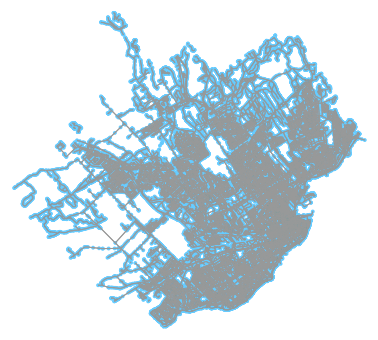

(<Figure size 706.136x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c50f4e9e8>)

In [16]:
ox.plot_graph(graphQc,
              save=True, 
              filename='graphQcseabornbornStreets', 
              file_format='png')

In [12]:
#Add edge grades
graphQcWithElevation=ox.add_edge_grades(graphQcWithElevation)

In [13]:
# project the street network to UTM
graphQcWithElevation_proj = ox.project_graph(graphQcWithElevation)

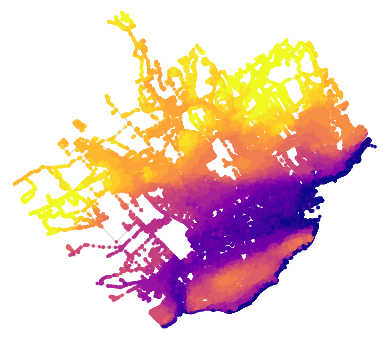

In [15]:
ncQc = ox.get_node_colors_by_attr(graphQcWithElevation_proj, 'elevation', cmap='plasma', num_bins=20)
fig, ax = ox.plot_graph(graphQcWithElevation_proj, 
                        fig_height=6, 
                        node_color=ncQc, 
                        node_size=12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        save=True, 
                        filename='graphQcWithElevation', 
                        file_format='png')

In [118]:
type(ncQc)

list

In [4]:
placeMtl=['Montréal, canada']


graphMtl = ox.graph_from_place(placeMtl, 
                           simplify=False,
                           retain_all=True)

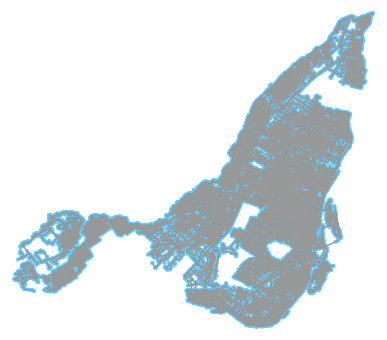

(<Figure size 705.146x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c85abaa58>)

In [17]:
ox.plot_graph(graphMtl,
              save=True, 
              filename='graphMtlStreets', 
              file_format='png')

In [6]:
filePathPickleMtl=os.path.join(ROOT_DIR,"Data","Pickle", "graphElevationMtl.pickle")
if os.path.isfile(filePathPickleMtl):
    print("File exists => reading graph")
    pickle_in = open(filePathPickle,"rb")
    graphMtlWithElevation = pickle.load(pickle_in)
else:
    print("File does not exists => calling google api")
    graphMtlWithElevation=ox.add_node_elevations(graphMtl, api_key=googleKey)
    pickle_out = open(filePathPickleMtl,"wb")
    pickle.dump(graphMtlWithElevation, pickle_out)
    pickle_out.close()

File does not exists => calling google api


In [7]:
graphMtlWithElevation=ox.add_edge_grades(graphMtlWithElevation)
graphMtlWithElevation_proj = ox.project_graph(graphMtlWithElevation)

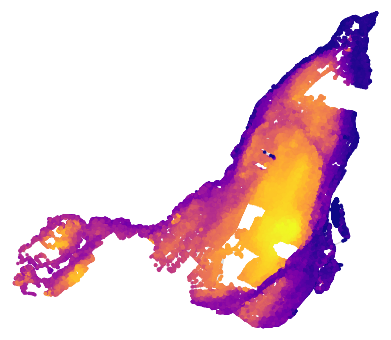

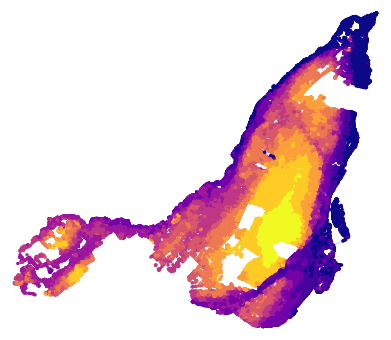

In [174]:
ncMtl = ox.get_node_colors_by_attr(graphMtlWithElevation, 'elevation', cmap='plasma', num_bins=110) #change the num of bins
fig, ax = ox.plot_graph(graphMtlWithElevation_proj, 
                        fig_height=6, 
                        node_color=ncMtl, 
                        node_size=12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        save=True, 
                        filename='graphMtlWithElevation', 
                        file_format='png')

ncMtl = ox.get_node_colors_by_attr(graphMtlWithElevation, 'elevation', cmap='plasma', num_bins=10) #change the num of bins
fig, ax = ox.plot_graph(graphMtlWithElevation_proj, 
                        fig_height=6, 
                        node_color=ncMtl, 
                        node_size=12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        save=True, 
                        filename='graphMtlWithElevation', 
                        file_format='png')

In [301]:

listElevationsQcQuant, bins=pd.qcut(listElevationsQc,20,retbins=True)
print(listElevationsQcQuant[:2])
bins

[(74.32, 82.398], (30.63, 48.742]]
Categories (20, interval[float64]): [(-2.272, 7.006] < (7.006, 9.509] < (9.509, 14.373] < (14.373, 16.677] ... (161.934, 178.798] < (178.798, 208.071] < (208.071, 265.74] < (265.74, 579.726]]


array([ -2.271  ,   7.006  ,   9.509  ,  14.3729 ,  16.677  ,  22.0435 ,
        30.6302 ,  48.7421 ,  58.131  ,  67.45635,  74.3205 ,  82.39765,
        90.6406 , 102.9129 , 121.2191 , 145.952  , 161.9344 , 178.7981 ,
       208.0714 , 265.7402 , 579.726  ])

In [268]:
pd.cut(range(5),3,labels=["good","medium","bar"])

[good, good, medium, bar, bar]
Categories (3, object): [good < medium < bar]

In [269]:
listElevationsQc=[dat[1]["elevation"] for dat in graphQcWithElevation.nodes.data() ]
_, listElevationsQcQuant=pd.qcut(listElevationsQc,20,retbins=True) #return the bins

In [270]:
listElevationsMtl=[dat[1]["elevation"] for dat in graphMtlWithElevation.nodes.data() ]
_, listElevationsMtlQuant=pd.cut(listElevationsMtl,20,retbins=True)

/home/charles/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


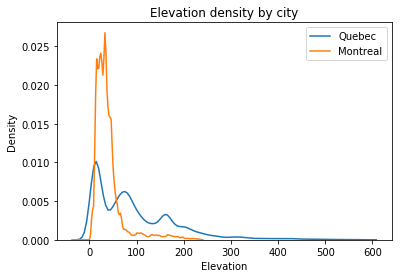

In [271]:
ax  = sns.kdeplot(listElevationsQc,label="Quebec")
sns.kdeplot(listElevationsMtl,label="Montreal")

ax.set(xlabel='Elevation', ylabel='Density')
ax.set_title("Elevation density by city")
fig = ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","qcMtlElevationDensity.png"))

In [272]:
listAllElevations=listElevationsQc+listElevationsMtl
listPercentiles=[ 100/(i+1) for i in range(20)]
print(listPercentiles)
np.percentile(listAllElevations, listPercentiles )

[100.0, 50.0, 33.333333333333336, 25.0, 20.0, 16.666666666666668, 14.285714285714286, 12.5, 11.11111111111111, 10.0, 9.090909090909092, 8.333333333333334, 7.6923076923076925, 7.142857142857143, 6.666666666666667, 6.25, 5.882352941176471, 5.555555555555555, 5.2631578947368425, 5.0]


array([579.726     ,  38.39      ,  26.77233333,  21.73425   ,
        18.568     ,  16.569     ,  15.596     ,  14.892125  ,
        14.289     ,  13.6869    ,  13.101     ,  12.586     ,
        12.09815385,  11.638     ,  11.196     ,  10.661     ,
        10.12411765,   9.62772222,   9.252     ,   8.931     ])

In [273]:
dfDist=pd.DataFrame(
    {"Elevation":listAllElevations,
    "Probability":[1/len(listAllElevations) for i in range(len(listAllElevations))]
    }
)
dfDist.sort_values(by=["Elevation"], inplace=True)

dfDist["CumProbability"]=dfDist["Probability"].cumsum()
dfDist.head()

Elevation  Probability  CumProbability
211247    -31.611     0.000005        0.000005
4183       -2.271     0.000005        0.000009
146        -2.146     0.000005        0.000014
10842      -1.981     0.000005        0.000018
57855      -1.296     0.000005        0.000023

In [ ]:
#Same but take the log elevation to try to concentrate the colors
listAllElevations=listElevationsQc+listElevationsMtl
listPercentiles=[ 100/(i+1) for i in range(20)]
np.percentile(np.log10(listAllElevations), listPercentiles )

In [350]:
dfDistLog=pd.DataFrame(
    {"LogElevation":np.log10(listAllElevations),
    "Probability":[1/len(listAllElevations) for i in range(len(listAllElevations))]
    }
)
dfDistLog.sort_values(by=["LogElevation"], inplace=True)

dfDistLog["CumProbability"]=dfDistLog["Probability"].cumsum()
dfDistLog.head()

/home/charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


LogElevation  Probability  CumProbability
147       -0.688246     0.000005        0.000005
10840     -0.459671     0.000005        0.000009
10919     -0.191114     0.000005        0.000014
57857     -0.117475     0.000005        0.000018
107       -0.071604     0.000005        0.000023

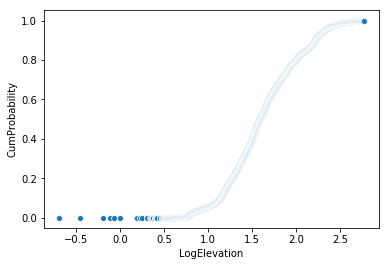

In [351]:
sns.scatterplot(x="LogElevation",y="CumProbability",data=dfDistLog)

/home/charles/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/charles/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/charles/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


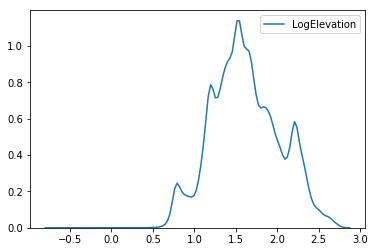

In [366]:
sns.kdeplot(dfDistLog['LogElevation'])

In [274]:
idx=bisect.bisect_left(dfDist["CumProbability"],0.2) #20th percentile
dfDist.loc[idx,:]

Elevation         104.779000
Probability         0.000005
CumProbability      0.815811
Name: 62976, dtype: float64

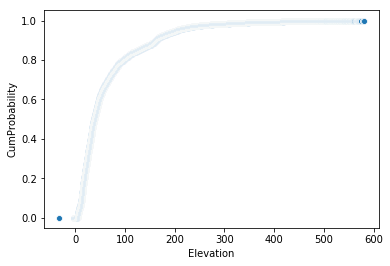

In [275]:
sns.scatterplot(x="Elevation",y="CumProbability",data=dfDist)

/home/charles/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


array([579.726     ,  38.39      ,  26.77233333,  21.73425   ,
        18.568     ,  16.569     ,  15.596     ,  14.892125  ,
        14.289     ,  13.6869    ,  13.101     ,  12.586     ,
        12.09815385,  11.638     ,  11.196     ,  10.661     ,
        10.12411765,   9.62772222,   9.252     ,   8.931     ])

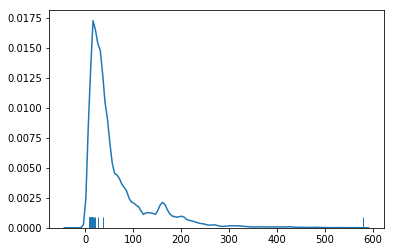

In [288]:
sns.kdeplot(listAllElevations)
sns.rugplot(np.percentile(listAllElevations, listPercentiles ))
np.percentile(listAllElevations, listPercentiles )
#sns.scatterplot(x="Elevation",y="CumProbability",data=dfDist)

In [185]:
import matplotlib.pyplot as plt


_vmin,_vmax = np.min(listAllElevations),  np.max(listAllElevations)
ncQc = ox.get_node_colors_by_attr(graphQcWithElevation_proj, 
                                  'elevation',
                                  cmap='plasma',
                                  num_bins=20,
                                  start=_vmin,
                                  stop=_vmax)
ncMtl = ox.get_node_colors_by_attr(graphMtlWithElevation_proj, 
                                  'elevation',
                                  cmap='plasma',
                                  num_bins=20,
                                  start=_vmin,
                                  stop=_vmax)
ncQcNoMinMax = ox.get_node_colors_by_attr(graphQcWithElevation_proj, 
                                  'elevation',
                                  cmap='plasma',
                                  num_bins=20)
print( ncQc[:3], ncQcNoMinMax[:3])
#type(ncQc)

[(0.940015, 0.975158, 0.131326, 1.0), (0.940015, 0.975158, 0.131326, 1.0), (0.940015, 0.975158, 0.131326, 1.0)] [(0.819651, 0.306812, 0.448306, 1.0), (0.584391, 0.068579, 0.632812, 1.0), (0.819651, 0.306812, 0.448306, 1.0)]


In [186]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
#gradient

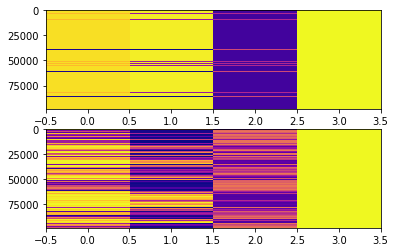

In [187]:
fig,(ax1,ax2)=plt.subplots(2,1)
ax1.imshow(ncQc,cmap="plasma",aspect='auto')
ax2.imshow(ncQcNoMinMax,cmap="plasma",aspect='auto')

In [206]:
print(listElevationsQcQuant[:2])
print(listElevationsMtlQuant[:2])

[-2.271  7.006]
[-31.878062 -18.2579  ]


In [279]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

_vmin = min(np.min(listElevationsQcQuant), 
             np.min(listElevationsMtlQuant)) 
_vmax  = max (np.max(listElevationsQcQuant),
              np.max(listElevationsMtlQuant)) 
cNorm  = colors.Normalize(vmin=_vmin, vmax=_vmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmx.plasma)


 

scalarMap.to_rgba(1)

(0.171574, 0.019706, 0.580806, 1.0)

In [280]:

#Continuous (no binning with quantiles) + linear scale
dictMtlElevationVals= nx.get_node_attributes(graphMtlWithElevation_proj, "elevation")
listMtlElevationVals=[ v for k,v in dictMtlElevationVals.items()]
listMtlColors=[scalarMap.to_rgba(i) for i in listElevationsMtlQuant ]  #normalization is crucial => otherwise all get same color
 
dictQcElevationVals= nx.get_node_attributes(graphQcWithElevation_proj, "elevation")
listQcElevationVals=[ v for k,v in dictQcElevationVals.items()]
listQcColors=[scalarMap.to_rgba(i) for i in listElevationsQcQuant ]


[(0.050383, 0.029803, 0.527975, 1.0),
 (0.10598, 0.024309, 0.551368, 1.0),
 (0.156421, 0.020651, 0.574065, 1.0),
 (0.193374, 0.018354, 0.59033, 1.0),
 (0.234715, 0.015502, 0.607592, 1.0),
 (0.274191, 0.012109, 0.622722, 1.0),
 (0.30621, 0.008902, 0.633694, 1.0),
 (0.343925, 0.004991, 0.64471, 1.0),
 (0.374897, 0.002245, 0.651876, 1.0),
 (0.41158, 0.000577, 0.65773, 1.0)]

In [ ]:

dictMtlElevationVals= nx.get_node_attributes(graphMtlWithElevation_proj, "elevation")
listMtlElevationVals=[ v for k,v in dictMtlElevationVals.items()]
listMtlColors=[scalarMap.to_rgba(i) for i in listElevationsMtlQuant ]  #normalization is crucial => otherwise all get same color
 
dictQcElevationVals= nx.get_node_attributes(graphQcWithElevation_proj, "elevation")
listQcElevationVals=[ v for k,v in dictQcElevationVals.items()]
listQcColors=[scalarMap.to_rgba(i) for i in listElevationsQcQuant ]


In [281]:
listElevationsQcQuant

array([ -2.271  ,   7.006  ,   9.509  ,  14.3729 ,  16.677  ,  22.0435 ,
        30.6302 ,  48.7421 ,  58.131  ,  67.45635,  74.3205 ,  82.39765,
        90.6406 , 102.9129 , 121.2191 , 145.952  , 161.9344 , 178.7981 ,
       208.0714 , 265.7402 , 579.726  ])

In [282]:
listElevationsQc[:2]

[78.863, 38.864]

In [283]:
import bisect
 
bucketIdx=bisect.bisect_left(listElevationsQcQuant ,48.7421) #intervals are treated as: (a,b]  so a will match (c,a]
print(listElevationsQcQuant[bucketIdx-1],listElevationsQcQuant[bucketIdx])

bucketIdx=bisect.bisect_left(listElevationsQcQuant ,30.63020000000004)
print(listElevationsQcQuant[bucketIdx-1],listElevationsQcQuant[bucketIdx])

30.63020000000004 48.7421
22.0435 30.63020000000004


In [284]:
def getIntervalIdxPointColor(colMap,listEndpoints,point):
    intervalIdx=bisect.bisect_left(listEndpoints  , point) 
    return( colMap.to_rgba( listEndpoints[intervalIdx] )  )

In [285]:
#First try
#Discrete (binning with quantiles) + linear scale
#Try with quantiles => weird results since this is like using a categorical color map with intensity => not smooth on map 
listMtlColors=[getIntervalIdxPointColor(scalarMap, listElevationsMtlQuant, i ) for i in listElevationsMtl  ]  #normalization is crucial => otherwise all get same color
listQcColors=[getIntervalIdxPointColor(scalarMap, listElevationsQcQuant, i ) for i in listElevationsQc ]

print(len(listMtlColors),len(listQcColors))

122166 98564


In [318]:
#Second try with actual elevation values
_vmin = min(np.min(listElevationsQc ), 
             np.min(listElevationsMtl )) 
_vmax  = max (np.max(listElevationsQc ),
              np.max(listElevationsMtl )) 
cNorm  = colors.Normalize(vmin=_vmin, vmax=_vmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmx.plasma)


In [319]:
#Continuous (no binning with quantiles) + linear scale
listMtlColors=[scalarMap.to_rgba(i) for i in listElevationsMtl  ]  #normalization is crucial => otherwise all get same color
listQcColors=[scalarMap.to_rgba(i)  for i in listElevationsQc ]

In [362]:
listElevationsAll=listElevationsQc+listElevationsMtl
minVal=np.min(listElevationsAll)
minVal
eps=20
np.min(listElevationsQc+np.abs(minVal))

29.34

In [363]:
#Third try : log scale + continuous binning

#Watch out we are taking log and there are negative values (presumably below sea level)
listElevationsAll=listElevationsQc+listElevationsMtl
minValOffset=abs(np.min(listElevationsAll))+eps

print(np.min(listElevationsQc+minValOffset),np.min(listElevationsMtl+minValOffset))
listElevationsQcLog=np.log10(listElevationsQc+minValOffset)
listElevationsMtlLog=np.log10(listElevationsMtl+minValOffset)
_vmin = min(np.min(listElevationsQcLog ), 
             np.min(listElevationsMtlLog )) 
_vmax  = max (np.max(listElevationsQcLog ),
              np.max(listElevationsMtlLog )) 
cNorm  = colors.Normalize(vmin=_vmin, vmax=_vmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmx.plasma)

49.34 20.000000000000004


In [364]:
#Continuous (no binning with quantiles) + linear scale
listMtlColors=[scalarMap.to_rgba(i) for i in listElevationsMtlLog  ]  #normalization is crucial => otherwise all get same color
listQcColors=[scalarMap.to_rgba(i)  for i in listElevationsQcLog ]

In [ ]:
#Forth try, log scale with lower truncation to avoid plotting too many of the same color

In [367]:
def truncateLower(x,lowerThresh):
    return( max(x,lowerThresh) )

In [379]:
listElevationsAll=listElevationsQc+listElevationsMtl
minValOffset=abs(np.min(listElevationsAll))+eps
thresh=1.7

listElevationsQcLog=np.log10(listElevationsQc+minValOffset)
listElevationsMtlLog=np.log10(listElevationsMtl+minValOffset)

listElevationsQcLogTrunc=[truncateLower(i,thresh) for i in listElevationsQcLog ]
listElevationsMtlLogTrunc=[truncateLower(i,thresh) for i in listElevationsMtlLog ]

In [380]:
#Continuous (no binning with quantiles) + linear scale
listMtlColors=[scalarMap.to_rgba(i) for i in listElevationsMtlLogTrunc  ]  #normalization is crucial => otherwise all get same color
listQcColors=[scalarMap.to_rgba(i)  for i in listElevationsQcLogTrunc ]

/home/charles/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


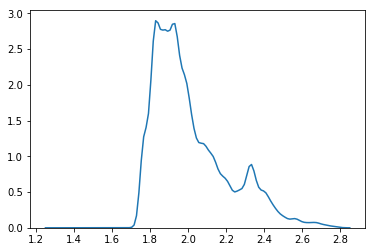

In [381]:
sns.kdeplot(listElevationsQcLog.tolist() + listElevationsMtlLog.tolist() )

/home/charles/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


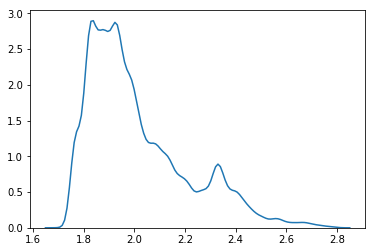

In [382]:
sns.kdeplot(listElevationsQcLogTrunc+listElevationsMtlLogTrunc)

In [395]:
#Mont royal?
np.log10( 200 +minValOffset )

2.400729623795779

In [304]:
print( len(list(set(listMtlColors))) , len(list(set(listQcColors))) )

99 243


In [253]:
print( cmx.plasma(100))
print(cmx.plasma(35.9))
print(listMtlElevationVals[9], cmx.plasma(listMtlElevationVals[9]) )
print(scalarMap.to_rgba(35.9))
print(scalarMap.to_rgba(listMtlElevationVals[9]))


(0.683758, 0.156278, 0.57166, 1.0)
(0.940015, 0.975158, 0.131326, 1.0)
18.629 (0.940015, 0.975158, 0.131326, 1.0)
(0.274191, 0.012109, 0.622722, 1.0)
(0.227983, 0.016007, 0.604867, 1.0)


In [254]:
#ox.utils.induce_subgraph( graphMtlWithElevation_proj, listNodesMtl )
listNodesMtl=[dat[0] for k, dat in enumerate(graphMtlWithElevation_proj.nodes.data())  if  k<=100]
listNodesMtl[:4]

[16874327, 16874351, 16874353, 16874354]

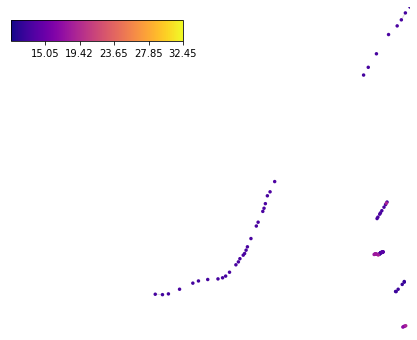

In [299]:
listNodesMtl=[dat[0] for k, dat in enumerate(graphMtlWithElevation_proj.nodes.data()) if k <= 100]
fig, ax = ox.plot_graph(ox.utils.induce_subgraph( graphMtlWithElevation_proj, listNodesMtl ), 
                        fig_height=6, 
                        node_color=listMtlColors[:101], 
                        node_size=12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )

#fig, ax = plt.subplots()
cax = fig.add_axes([-0.27, 0.8, 0.5, 0.05])

im = ax.imshow(listMtlColors, cmap='plasma')
figBar=fig.colorbar(im, cax=cax, orientation='horizontal')
ax.xaxis.set_major_formatter(plt.NullFormatter())


figBar.ax.set_xticklabels(np.percentile(listMtlElevationVals,[(i+1)*10 for i in range(10)]).round(2)) 
plt.show()

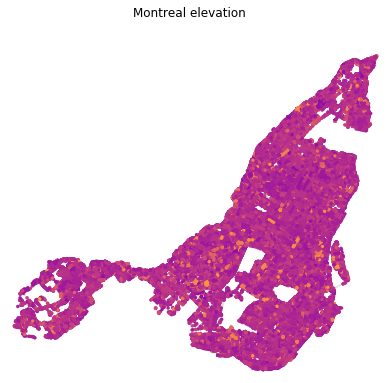

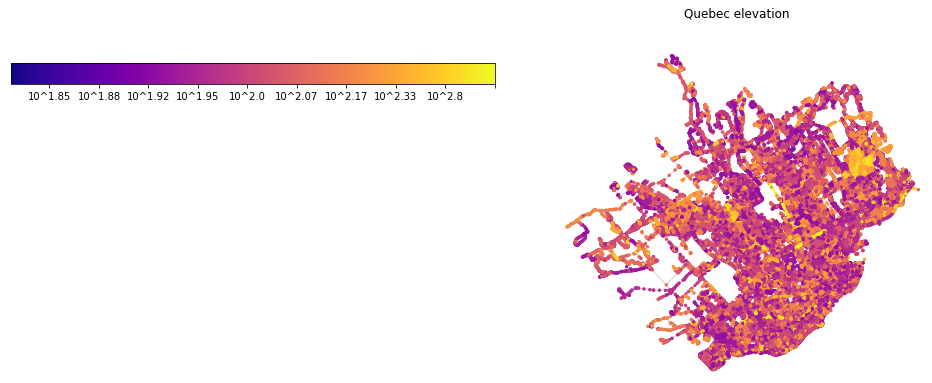

In [393]:

listNodesMtl=[dat[0] for k, dat in enumerate(graphMtlWithElevation_proj.nodes.data()) ]
fig, ax = ox.plot_graph(ox.utils.induce_subgraph( graphMtlWithElevation_proj, listNodesMtl ), 
                        fig_height=6, 
                        node_color=listMtlColors, 
                        node_size=12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                        close=False,
                        show=False
                       )
fig.suptitle("Montreal elevation")


listNodesQc=[dat[0] for k, dat in enumerate(graphQcWithElevation_proj.nodes.data()) ]
fig, ax = ox.plot_graph(ox.utils.induce_subgraph( graphQcWithElevation_proj, listNodesQc),
                        fig_height=6, 
                        node_color=listQcColors, 
                        node_size=12, 
                        node_zorder=2, 
                        edge_color='#dddddd',
                         close=False,
                        show=False)
fig.suptitle("Quebec elevation")

#fig, ax = plt.subplots()
cax = fig.add_axes([-1, 0.8, 1, 0.05])
im = ax.imshow(listMtlColors+listQcColors, cmap='plasma')
figBar=fig.colorbar(im,
                    cax=cax, 
                    orientation='horizontal') 

tick_locator = ticker.MaxNLocator(nbins=10)
figBar.locator = tick_locator
figBar.update_ticks()

listPercentilesLog=np.percentile(listElevationsQcLogTrunc+listElevationsMtlLogTrunc,[(i+1)*10 for i in range(10)])
logTicks=[ "10^{}".format(round(f,2)) for f in listPercentilesLog]

figBar.ax.set_xticklabels(logTicks) 
ax.xaxis.set_major_formatter(plt.NullFormatter())


fig = ax.get_figure()
fig.savefig(os.path.join(ROOT_DIR,"Figures","qcMtlElevationMapsBoth.png"))

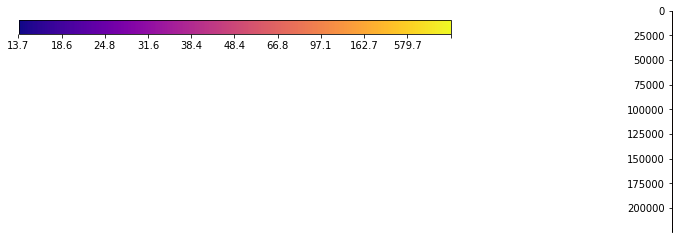

In [348]:
from matplotlib import ticker

data = np.arange(100, 0, -1).reshape(10, 10)

fig, ax = plt.subplots()

cax = fig.add_axes([-1, 0.8, 1, 0.05])
im = ax.imshow(listMtlColors+listQcColors, cmap='plasma')
figBar=fig.colorbar(im,
                    cax=cax, 
                    orientation='horizontal') 

tick_locator = ticker.MaxNLocator(nbins=10)
figBar.locator = tick_locator
figBar.update_ticks()

figBar.ax.set_xticklabels(np.percentile(listAllElevations,[(i+1)*10 for i in range(10)]).round(1)) 
ax.xaxis.set_major_formatter(plt.NullFormatter())



plt.show()

In [322]:
np.percentile(listAllElevations,[(i+1)*10 for i in range(10)]).round(2)

array([ 13.69,  18.57,  24.75,  31.65,  38.39,  48.39,  66.84,  97.11,
       162.7 , 579.73])

In [323]:
len(np.percentile(listAllElevations,[(i+1)*10 for i in range(10)]).round(2))

10

In [326]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [386]:
np.power(np.percentile(listElevationsQcLogTrunc+listElevationsMtlLogTrunc,[(i+1)*10 for i in range(10)])),10).round(1)


SyntaxError: invalid syntax (<ipython-input-386-ff2545991175>, line 1)

In [389]:
listPercentilesLog=np.percentile(listElevationsQcLogTrunc+listElevationsMtlLogTrunc,[(i+1)*10 for i in range(10)])
np.power(listPercentilesLog,10)

array([  387.72618025,   460.04926989,   560.09221545,   682.26347154,
         812.44745696,  1023.97776423,  1469.36333463,  2340.62613524,
        4736.99093584, 29647.32367074])

In [392]:
[ "10^{}".format(round(f,2)) for f in np.power(listPercentilesLog,10)]

['10^387.73',
 '10^460.05',
 '10^560.09',
 '10^682.26',
 '10^812.45',
 '10^1023.98',
 '10^1469.36',
 '10^2340.63',
 '10^4736.99',
 '10^29647.32']

In [396]:
10**2.8


630.957344480193